 Loading the Dataset

# **This dataset contains customer feedback data for the Blinkit service, with 5,000 entries and 8 columns. Here's a breakdown of each column:**

# **feedback_id –** A unique identifier for each feedback entry.

# **order_id –** The ID of the order related to the feedback.

# **customer_id –** The ID of the customer who gave the feedback.

# **rating –** A numerical rating (typically from 1 to 5) given by the customer.

# **feedback_text –** The written comment or feedback from the customer.

# **feedback_category – **The category of the feedback, e.g., "Delivery" or "App Experience."

# **sentiment –** The sentiment classification of the feedback: "Positive", "Negative", or "Neutral."

**# feedback_date – ** The date the feedback was submitted.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving blinkit_customer_feedback.csv to blinkit_customer_feedback.csv


In [2]:
import pandas as pd

df = pd.read_csv("blinkit_customer_feedback.csv")
df.head()


feedback_id    order_id  customer_id  rating  \
0      2234710  1961864118     30065862       4   
1      5450964  1549769649      9573071       3   
2       482108  9185164487     45477575       3   
3      4823104  9644738826     88067569       4   
4      3537464  5427684290     83298567       3   

                          feedback_text feedback_category sentiment  \
0         It was okay, nothing special.          Delivery   Neutral   
1              The order was incorrect.    App Experience  Negative   
2         It was okay, nothing special.    App Experience   Neutral   
3      The product met my expectations.    App Experience   Neutral   
4  Product was damaged during delivery.          Delivery  Negative   

  feedback_date  
0    2024-07-17  
1    2024-05-28  
2    2024-09-23  
3    2023-11-24  
4    2023-11-20

In [3]:
print("Dataset Shape:", df.shape)

Dataset Shape: (5000, 8)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   feedback_id        5000 non-null   int64 
 1   order_id           5000 non-null   int64 
 2   customer_id        5000 non-null   int64 
 3   rating             5000 non-null   int64 
 4   feedback_text      5000 non-null   object
 5   feedback_category  5000 non-null   object
 6   sentiment          5000 non-null   object
 7   feedback_date      5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [5]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 feedback_id          0
order_id             0
customer_id          0
rating               0
feedback_text        0
feedback_category    0
sentiment            0
feedback_date        0
dtype: int64


In [6]:
df[~df['rating'].isin([1, 2, 3, 4, 5])]


Empty DataFrame
Columns: [feedback_id, order_id, customer_id, rating, feedback_text, feedback_category, sentiment, feedback_date]
Index: []

In [7]:
df.dtypes


feedback_id           int64
order_id              int64
customer_id           int64
rating                int64
feedback_text        object
feedback_category    object
sentiment            object
feedback_date        object
dtype: object

In [8]:
df['rating'].value_counts()


rating
4    1708
3    1398
5     816
1     540
2     538
Name: count, dtype: int64

In [9]:
print("Number of Duplicates:", df.duplicated().sum())

Number of Duplicates: 0


In [10]:
df.duplicated().sum()


np.int64(0)

In [11]:
df.describe()

feedback_id      order_id   customer_id      rating
count  5.000000e+03  5.000000e+03  5.000000e+03  5000.00000
mean   5.013616e+06  5.029129e+09  5.009685e+07     3.34440
std    2.857341e+06  2.863533e+09  2.919082e+07     1.18982
min    9.470000e+02  6.046500e+04  3.181300e+04     1.00000
25%    2.576690e+06  2.531421e+09  2.404314e+07     3.00000
50%    5.005833e+06  5.074378e+09  4.997808e+07     4.00000
75%    7.486478e+06  7.488579e+09  7.621215e+07     4.00000
max    9.999293e+06  9.998298e+09  9.989390e+07     5.00000


# Handling Missing **Values**



In [12]:
df.dropna(inplace=True)

# Removing **Duplicates**

In [13]:
df.drop_duplicates(inplace=True)

# ** Data Type Conversion**

In [14]:
df['rating'] = df['rating'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   feedback_id        5000 non-null   int64 
 1   order_id           5000 non-null   int64 
 2   customer_id        5000 non-null   int64 
 3   rating             5000 non-null   int64 
 4   feedback_text      5000 non-null   object
 5   feedback_category  5000 non-null   object
 6   sentiment          5000 non-null   object
 7   feedback_date      5000 non-null   object
dtypes: int64(4), object(4)
memory usage: 312.6+ KB


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['rating'])
plt.title("Boxplot of Ratings")
plt.show()


# Feature Engineering (Adding New Columns)**bold text**

In [17]:
import re

if 'feedback_text' in df.columns:
    df['feedback_text'] = df['feedback_text'].astype(str)
    df['feedback_text'] = df['feedback_text'].str.lower()
    df['feedback_text'] = df['feedback_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
    df['feedback_text'] = df['feedback_text'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

    print(df['feedback_text'].head())


0            it was okay nothing special
1                the order was incorrect
2            it was okay nothing special
3        the product met my expectations
4    product was damaged during delivery
Name: feedback_text, dtype: object


In [18]:
df['feedback_date'] = pd.to_datetime(df['feedback_date'])


# 🔹 1. Understanding Rating Distribution

In [22]:
import matplotlib.pyplot as plt  # Importing the necessary libraries for plotting
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x=df['rating'], palette='mako')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.ylim(200, plt.ylim()[1])  # Setting the Y-axis to start from 200
plt.show()



<ipython-input-22-58f8ded8e0c4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['rating'], palette='mako')


#  2. Feedback Length Analysis

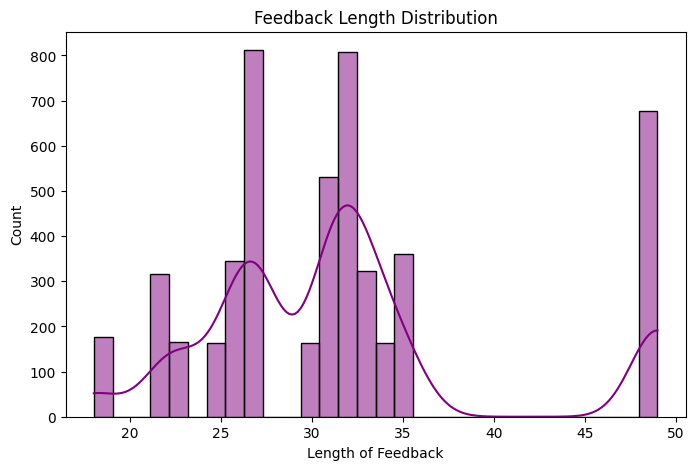

In [23]:
# Calculating the length of feedback text and plotting its distribution

df['feedback_length'] = df['feedback_text'].apply(lambda x: len(str(x)))

plt.figure(figsize=(8, 5))
sns.histplot(df['feedback_length'], bins=30, kde=True, color='purple')
plt.title("Feedback Length Distribution")
plt.xlabel("Length of Feedback")
plt.ylabel("Count")
plt.show()


# **3. Relationship Between Rating and Feedback Length**

<ipython-input-24-aa58d9c4b4b4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['rating'], y=df['feedback_length'], palette='mako')


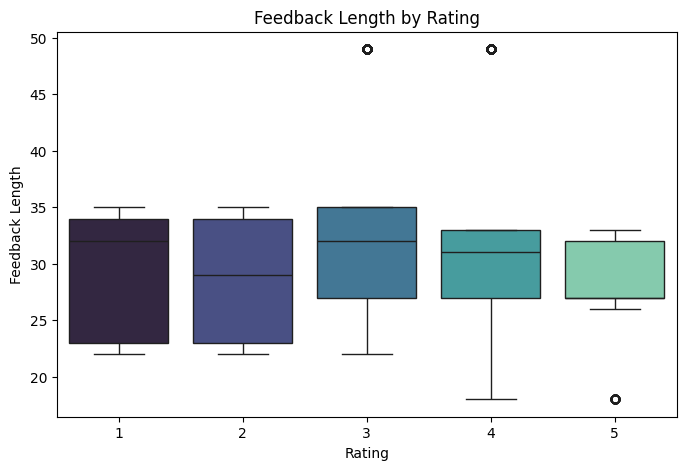

In [24]:
# Creating a boxplot to show the distribution of feedback length by rating

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['rating'], y=df['feedback_length'], palette='mako')
plt.title("Feedback Length by Rating")
plt.xlabel("Rating")
plt.ylabel("Feedback Length")
plt.show()



In [25]:
# Calculating the percentage of each rating and plotting it as a bar chart

rating_counts = df['rating'].value_counts(normalize=True) * 100  # Calculating the percentage of each rating

plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='mako')
plt.title("Percentage of Each Rating")
plt.xlabel("Rating")
plt.ylabel("Percentage")
plt.ylim(5, plt.ylim()[1])  # Setting the Y-axis to start from 5
plt.show()


<ipython-input-25-388693ecd49b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='mako')


# ** 4. Word Cloud for Most Common Words in Feedback**

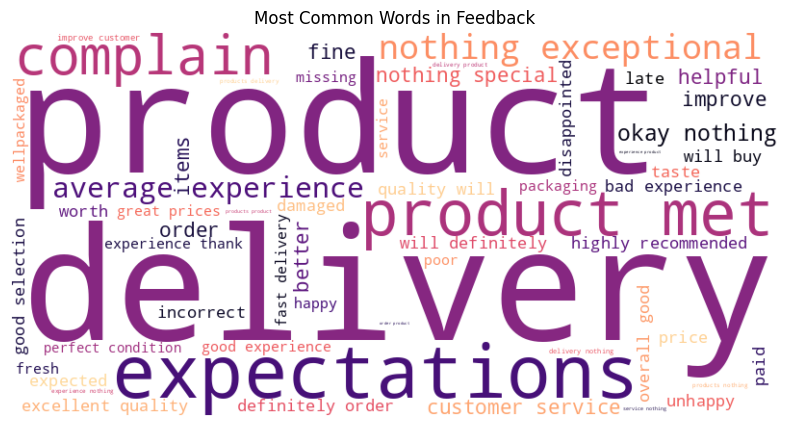

In [26]:
# Creating a word cloud to visualize the most common words in feedback text

from wordcloud import WordCloud

text = ' '.join(df['feedback_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Feedback")
plt.show()


# ** 5. Average Feedback Length per Rating**

<ipython-input-29-2cc11850d1e1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length_per_rating.index, y=avg_length_per_rating.values, palette="Blues")


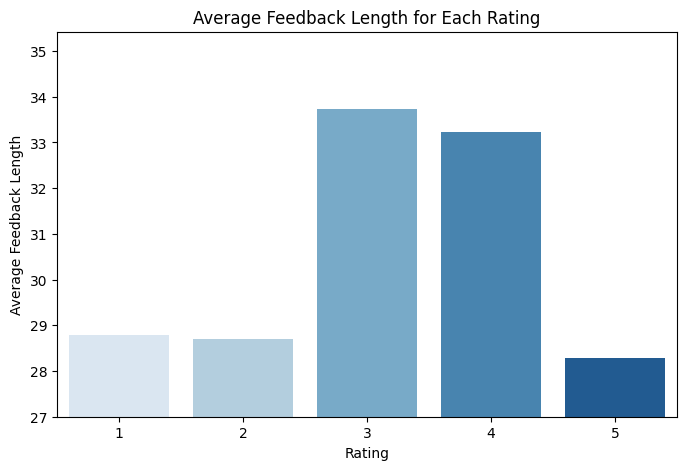

In [29]:
# Calculating the average feedback length for each rating and visualizing it as a bar plot with shades of blue

avg_length_per_rating = df.groupby("rating")["feedback_length"].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=avg_length_per_rating.index, y=avg_length_per_rating.values, palette="Blues")
plt.title("Average Feedback Length for Each Rating")
plt.xlabel("Rating")
plt.ylabel("Average Feedback Length")
plt.ylim(27, plt.ylim()[1])
plt.show()


Saving the Cleaned Data

In [30]:
df.to_csv("cleaned_blinkit_feedback.csv", index=False)


In [33]:
from google.colab import files

files.download("cleaned_blinkit_feedback.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>